<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" style="height:90px;" width=500/></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

## Matplotlib

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive'
%cd 'My Drive'
%cd 'projects'
%cd 'deep_learning_school'
%cd '1.3'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive
/content/drive/My Drive
/content/drive/My Drive/projects
/content/drive/My Drive/projects/deep_learning_school
/content/drive/My Drive/projects/deep_learning_school/1.3


Для отображения в notebook

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Сейчас пора, когда многие болеют. Построим зависимость числа больных в семье Ивановых и Сидоровых от температуры на улице.

Мы имеем дискретное распределение, поэтому самое напрашиваемое представление это обычные точки

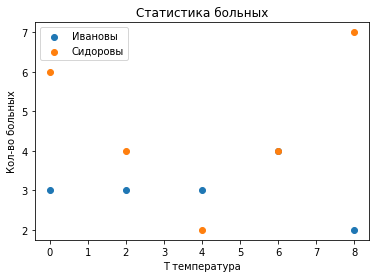

In [7]:
family_ivan = np.random.poisson(5, 5)
family_sid = np.random.poisson(5, 5)

x = np.arange(0, 10, 2)
plt.scatter(x, family_ivan, label='Ивановы')
plt.scatter(x, family_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Чтобы отследить зависмость лучше, воспользуемся непрерывным представление

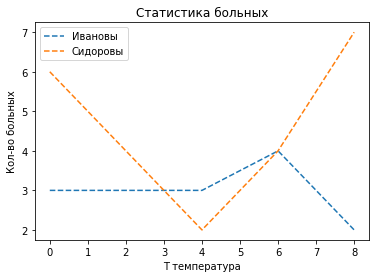

In [10]:
plt.plot(x, family_ivan, '--', label='Ивановы')
plt.plot(x, family_sid, '--', label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Давайте попробуем другое представление полученных данных c помощью bar-chart:

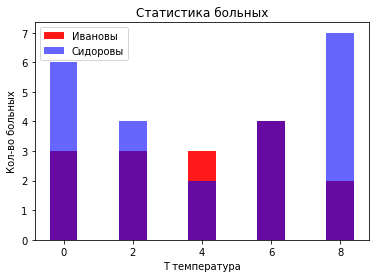

In [11]:
plt.bar(x, family_ivan, alpha=0.9
      , label='Ивановы', color='r')
plt.bar(x, family_sid, alpha=0.6, label='Сидоровы', color='b')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()


Давайте функции зависимоcти сделаем более гладкими:

In [0]:
from scipy.interpolate import interp1d
f_ivan = interp1d(np.arange(0, 10, 2), family_ivan, kind='quadratic', fill_value="extrapolate")
f_sid = interp1d(np.arange(0, 10, 2), family_sid, kind='quadratic', fill_value="extrapolate")

Отобразим получившиеся функции:

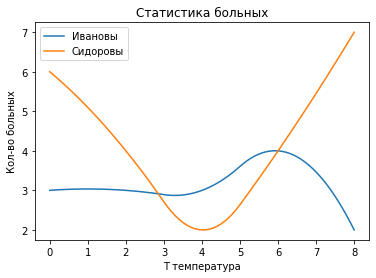

In [13]:
xnew = np.arange(0, 8.1, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Найдем самую оптимальную температуру для каждой семьи

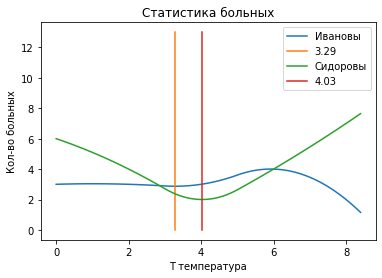

In [15]:
from scipy.optimize import minimize
min_ivan = minimize(f_ivan, x0=4)
min_sid = minimize(f_sid, x0=4)
xnew = np.arange(0, 8.5, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot([min_ivan.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_ivan.x[0].round(2)))
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.plot([min_sid.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_sid.x[0].round(2)))
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()